600
[-180.24211745] [[ 4.21521682 -0.01250579]]
[[-22.34441547 -36.54895519  17.47341035]
 [-22.0413865  -36.25263688  17.17038012]
 [-21.73835753 -35.95631857  16.86734989]
 ...
 [  6.81205002   8.93831315 -11.97646269]
 [  7.11507899   9.23463146 -12.27949292]
 [  7.41810796   9.53094977 -12.58252315]]
[[2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 ...
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]]


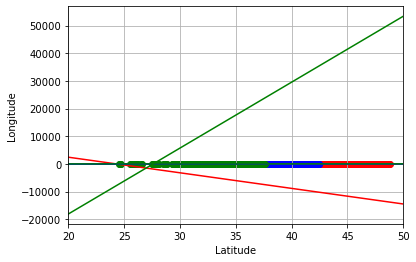

In [117]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
import sklearn


df = pd.read_csv("ENGR_518_Solar_energy_datasets.csv")


x=df.iloc[:, 3:5]

df.insert(df.shape[1], 'class', 0)
# print(df)
# df.iat[0, 8]
for i in range(0,925):
    if df.iat[i, 5]<=320:
        df.iat[i, 8]=0
    elif 320<df.iat[i, 5]<=340:
        df.iat[i, 8]=1
    else:
        df.iat[i, 8]=2
# print(df.iloc[:,5:])
y=df.iloc[:,8]
# print(y)
df.to_csv('myENGR_518_Solar_energy_datasets.csv')
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=600, random_state=None)
# print(X_test,y_test)
x1=X_train.iloc[:, 0]#Latitude
x2=X_train.iloc[:, 1]#Longitude
x3=X_test.iloc[:,0]
x4=X_test.iloc[:,1]
# print(y_train)

# print(x1)
colors=('r','b', 'g')
plt.scatter(x1[y==0],x2[y==0],c=colors[0])
plt.scatter(x1[y==1],x2[y==1],c=colors[1])
plt.scatter(x1[y==2],x2[y==2],c=colors[2]) 
plt.grid(1)
# plt.grid(1)
# plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel('Latitude')
plt.ylabel('Longitude')



# train model1
y1=y_train.copy()
y1[y!=0]=-1
# print(y1[0])
y1[y==0]=1
print(len(y1))
# print(y1)
log_regress1 = linear_model.LogisticRegression()
log_regress1.fit(X_train,y1)
# x1p=np.linspace(1,5,20)
#x2p=-(log_regress1.intercept_+log_regress1.coef_[0][0]*x1p)/log_regress1.coef_[0][1]
# print(log_regress1.predict(X_train))



# train model2
y2=y_train.copy()
y2[y!=1]=-1
y2[y==1]=1
# print(y2) 
log_regress2 = linear_model.LogisticRegression()
log_regress2.fit(X_train,y2)
# print(log_regress2.predict(X_train))



# train model3

y3=y_train.copy()
y3[y!=2]=-1
y3[y==2]=1
log_regress3 = linear_model.LogisticRegression()
log_regress3.fit(X_train,y3)
# print(log_regress3.predict(X_train))
xp1, xp2 = np.meshgrid(np.linspace(20,50,100),np.linspace(-140,-60,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
# print(xp1_v.shape,xp1.shape)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)

loss1,loss2,loss3=0,0,0
ya=log_regress1.predict(X_train)
yb=log_regress2.predict(X_train)
yc=log_regress3.predict(X_train)

# for i in range(0,len(y1)):
#     if y1.iloc(i)==ya[i]:
#         loss1+=1
# for i in range(0,len(y1)):
#     if y2[i]==yb[i]:
#         loss3+=1
# for i in range(0,len(y1)):
#     if y3[i]==yc[i]:
#         loss3+=1
# print("loss1=",loss1,"loss2=",loss2,"loss3=",loss3)







# calculate model outputs
c1=(log_regress1.intercept_+np.dot(Xp_data,log_regress1.coef_.T))/np.linalg.norm(log_regress1.coef_)
print(log_regress1.intercept_,log_regress1.coef_)
# print(c1)
c2=(log_regress2.intercept_+np.dot(Xp_data,log_regress2.coef_.T))/np.linalg.norm(log_regress2.coef_)
# print(c2)
c3=(log_regress3.intercept_+np.dot(Xp_data,log_regress3.coef_.T))/np.linalg.norm(log_regress3.coef_)
# append and reshape to plot
c=np.hstack((c1,c2,c3))
print(c)
z=np.argmax(c,axis=1)
# print(z)
z=z.reshape(xp1.shape)
print(z)
plt.contourf(xp1,xp2,z,alpha=.2)

xf1=[20, 50]
yf1=-(log_regress1.intercept_+log_regress1.coef_.T*xf1)/log_regress1.coef_
plt.plot(xf1,yf1,color='r')
xf2=[20, 50]
yf2=-(log_regress2.intercept_+log_regress2.coef_.T*xf)/log_regress2.coef_
plt.plot(xf2,yf2,color='b')
xf3=[20, 50]
yf3=-(log_regress3.intercept_+log_regress3.coef_.T*xf)/log_regress3.coef_
plt.plot(xf3,yf3,color='g')





520   -1
845    1
853    1
568   -1
497    1
      ..
569   -1
299    1
747    1
643   -1
713   -1
Name: class, Length: 600, dtype: int64
[[-3.43465982]
 [ 0.47234828]
 [ 0.24986816]] [[0.87479199]
 [0.28510216]
 [0.20630305]] [[ 7.06819248]
 [-0.89701584]
 [-0.30264615]]
1.2322687516440702 1.4770319567770598 0.5457711209469043
[[-112.5666966   -98.86689266  127.31898234]
 [-112.4250004   -98.68924729  127.22210751]
 [-112.28330421  -98.51160193  127.12523268]
 ...
 [ -28.10684313  -16.82370167   42.12026585]
 [ -27.96514693  -16.64605631   42.02339102]
 [ -27.82345074  -16.46841094   41.92651618]]
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


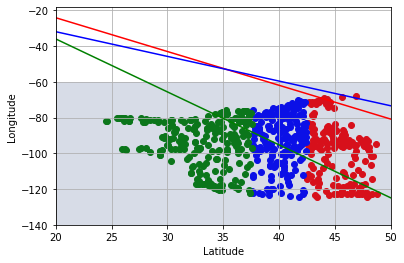

In [116]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
import sklearn

df = pd.read_csv("ENGR_518_Solar_energy_datasets.csv")

x = df.iloc[:, 3:5]

df.insert(df.shape[1], 'class', 0)
# print(df)
# df.iat[0, 8]
for i in range(0, 925):
    if df.iat[i, 5] <= 320:
        df.iat[i, 8] = 0
    elif 320 < df.iat[i, 5] <= 340:
        df.iat[i, 8] = 1
    else:
        df.iat[i, 8] = 2
# print(df.iloc[:,5:])
y = df.iloc[:, 8]
# print(y)
df.to_csv('myENGR_518_Solar_energy_datasets.csv')
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=600, random_state=None)
# print(X_test,y_test)
x1 = X_train.iloc[:, 0]  # Latitude
x2 = X_train.iloc[:, 1]  # Longitude
x3 = X_test.iloc[:, 0]
x4 = X_test.iloc[:, 1]
# print(y_train)

# print(x1)
colors = ('r', 'b', 'g')
plt.scatter(x1[y == 0], x2[y == 0], c=colors[0])
plt.scatter(x1[y == 1], x2[y == 1], c=colors[1])
plt.scatter(x1[y == 2], x2[y == 2], c=colors[2])
plt.grid(1)
# plt.grid(1)
# plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel('Latitude')
plt.ylabel('Longitude')


# train my model
def model(x_p, w):
    # compute linear comb and return
    a = w[0] + np.dot(x_p, w[1:])
    return a.T


# ********************************softmax***********************************#
# define sigmoid function
def sigmoid(t):
    return 1 / (1 + np.exp(-t))


# the convex cross-entropy cost function
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y * model(x, w))))
    return cost / float(np.size(y))


# ********************************softmax***********************************#

def self_gradienr(g):
    def partial(w):
        gap = 0.0001
        w0_a = [w[0] - w[0] * 0.00005, w[1], w[2]]
        w0_b = [w[0] + w[0] * 0.00005, w[1], w[2]]
        w1_a = [w[0], w[1] - w[1] * 0.00005, w[2]]
        w1_b = [w[0], w[1] + w[1] * 0.00005, w[2]]
        w2_a = [w[0], w[1], w[2] - w[2] * 0.00005]
        w2_b = [w[0], w[1], w[2] + w[2] * 0.00005]

        w0_gradient = (g(w0_b) - g(w0_a)) / (gap * w[0])
        w1_gradient = (g(w1_b) - g(w1_a)) / (gap * w[1])
        w2_gradient = (g(w2_b) - g(w2_a)) / (gap * w[2])

        return [w0_gradient, w1_gradient, w2_gradient]

    return partial


def gradient_descent(g, step, max_its, w, p):
    # compute gradient
    gradient = self_gradienr(g)
    # gradient descent loop
    # w = np.array([[1.], [1.]])
    weight_history = [w]  # weight history container
    cost_history = [g(w)]  # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd':  # diminishing step
            alpha = 1 / (k + 1)
        else:  # constant step
            alpha = step
        w = w - alpha * grad_eval_norm
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history


iter = 50000


# ----------------------------------------- train model1--------------------------------------------------------------
y1 = y_train.copy()
y1[y != 0] = -1
# print(y1[0])
y1[y == 0] = 1
# transfer pd to np
y1 = y1.values
X_train = X_train.values


def softmax1(w):
    cost = np.sum(np.log(1 + np.exp(-y1 * model(X_train, w))))
    return cost / float(np.size(y))


def c(t):
    c = softmax1(t)
    return c


w1 = np.array([[1.], [1.], [1.]])
a1, b1 = gradient_descent(c, 0.1, iter, w, 0)
# -------------------------------------------train model2---------------------------------------------------------
y2 = y_train.copy()
y2[y != 1] = -1
y2[y == 1] = 1

# transfer pd to np
y2 = y2.values


def softmax2(w):
    cost = np.sum(np.log(1 + np.exp(-y2 * model(X_train, w))))
    return cost / float(np.size(y))


def c(t):
    c = softmax2(t)
    return c


w2 = np.array([[1.], [1.], [1.]])
a2, b2 = gradient_descent(c, 0.1, iter, w, 0)
# ----------------------------------------------train model3------------------------------------------------------

y3 = y_train.copy()
y3[y != 2] = -1
y3[y == 2] = 1
print(y3)
# transfer pd to np
y3 = y3.values


def softmax3(w):
    cost = np.sum(np.log(1 + np.exp(-y3 * model(X_train, w))))
    return cost / float(np.size(y))


def c(t):
    c = softmax3(t)
    return c


w3 = np.array([[1.], [1.], [1.]])
a3, b3 = gradient_descent(c, 0.1, iter, w, 0)




xp1, xp2 = np.meshgrid(np.linspace(20, 50, 100), np.linspace(-140, -60, 100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1, 1)
# print(xp1_v.shape,xp1.shape)
xp2_v = xp2.reshape(-1, 1)
Xp_data = np.append(xp1_v, xp2_v, axis=1)
# print(Xp_data.shape, xp1_v.shape, xp1.shape)

# calculate model outputs
# c1 = -(a1[100][0]+a1[100, 1:]*Xp_data)/a1[100, 1:]
a1, a2, a3 = np.array(a1), np.array(a2), np.array(a3)
print(a1[iter,:],a2[iter,:],a3[iter,:])
print(b1[iter],b2[iter],b3[iter])
coef1, coef2, coef3 = a1[iter, 1:3], a2[iter, 1:3], a3[iter, 1:3]
transcoef1, transcoef2, transcoef3 = coef1[::-1], coef2[::-1], coef3[::-1]
# print(coef1, transcoef1)
#caculate the outpuut of model
c1 = (a1[100][0] + np.dot(Xp_data, transcoef1)) / np.linalg.norm(coef1)
# print(c1)
c2 = (a2[100][0] + np.dot(Xp_data, transcoef2)) / np.linalg.norm(coef2)
# print(c2)
c3 = (a3[100][0] + np.dot(Xp_data, transcoef3)) / np.linalg.norm(coef3)
# append and reshape to plot
c = np.hstack((c1, c2, c3))
print(c)
z = np.argmax(c, axis=1)
z = z.reshape(xp1.shape)
print(z)
plt.contourf(xp1, xp2, z, alpha=.2)



xf1=[20, 50]
yf1=-(a1[iter][0]+a1[iter][1]*xf1)/a1[iter][2]
plt.plot(xf1,yf1,color='r')
xf2=[20, 50]
yf2=-(a2[iter][0]+a2[iter][1]*xf)/a2[iter][2]
plt.plot(xf2,yf2,color='b')
xf3=[20, 50]
yf3=-(a3[iter][0]+a3[iter][1]*xf)/a3[iter][2]
plt.plot(xf3,yf3,color='g')


LogisticRegression: One-Vs-One
ACC in 1_2 train data: 1.0
ACC in 2_3 train data: 0.9929078014184397
ACC in 3_1 train data: 1.0
ACC in test data: 0.9876923076923076


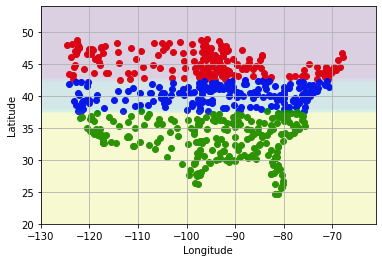

LogisticRegression in sklern: One-Vs-One
ACC in 1_2 train data: 1.0
ACC in 2_3 train data: 0.9929078014184397
ACC in 3_1 train data: 1.0
ACC in test data: 0.9846153846153847


In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class LinearLogsiticRegression(object):
    def __init__(self, alpha=0.01, accuracy=0.00001):
        self.thetas = None
        self.alpha = alpha
        self.accuracy = accuracy

    def sigmod(self, X):
        return 1 / (1 + (np.exp((-X))))

    def fit(self, X, y):
        # 插入第一列为1，构成xb矩阵
        self.thetas = np.full(X.shape[1] + 1, 0.5)
        a = np.full((X.shape[0], 1), 1)
        Xb = np.column_stack((a, X))
        dimension = X.shape[1] + 1
        # 梯度下降迭代
        count = 1
        while True:
            oldJ = self.costFunc(Xb, y)
            # 注意预测函数中使用的参数是未更新的
            c = self.sigmod(np.dot(Xb, self.thetas.reshape(-1, 1))) - y.reshape(-1, 1)
            c = c.reshape(-1, )
            for j in range(dimension):
                self.thetas[j] = self.thetas[j] - self.alpha * np.sum(c * Xb[:, j])
            newJ = self.costFunc(Xb, y)
            if newJ == oldJ or math.fabs(newJ - oldJ) < self.accuracy:
                # print("代价函数迭代到最小值，退出！")
                # print("收敛到:", newJ)
                break
            # print("迭代第", count, "次!")
            # print("代价函数上一次的差:", (newJ - oldJ))
            count += 1

    def costFunc(self, Xb, y):
        yPre = self.sigmod(np.dot(Xb, self.thetas.reshape(-1, 1)))
        loss = -(y.reshape(-1, 1) * np.log(yPre + 1e-7) + (1 - y.reshape(-1, 1)) * np.log(1 - yPre + 1e-7))
        return np.mean(loss)

    def predict_prob(self, X):
        a = np.full((len(X), 1), 1)
        Xb = np.column_stack((a, X))
        yPre = self.sigmod(np.dot(Xb, self.thetas.reshape(-1, 1))).reshape(-1, )
        return yPre

    def predict(self, X):
        yPre = self.predict_prob(X)
        yPre = np.where(yPre >= 0.5, 1, 0)
        return yPre

    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return np.mean(y_test == y_predict)


if __name__ == '__main__':
    show_plot = True
    use_sklearn = True
    raw_data = pd.read_csv("ENGR_518_Solar_energy_datasets.csv")
    location = np.array(raw_data.iloc[:, 3:5])
    ETR = np.array(raw_data.iloc[:, 5])
    category = np.zeros_like(ETR, dtype=int)
    category[ETR <= 320] = 0
    category[(ETR > 320) & (ETR <= 340)] = 1
    category[ETR > 340] = 2

    train_index = random.sample(list(range(category.shape[0])), k=600)
    test_index = list(set(list(range(category.shape[0]))) - set(train_index))
    X_train = location[np.array(train_index)]
    X_test = location[np.array(test_index)]
    y_train = category[np.array(train_index)]
    y_test = category[np.array(test_index)]

    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    X_train1_2 = X_train[(y_train == 0) | (y_train == 1)]
    X_train2_3 = X_train[(y_train == 1) | (y_train == 2)]
    X_train3_1 = X_train[(y_train == 2) | (y_train == 0)]
    y_train1_2 = np.where(y_train[(y_train == 0) | (y_train == 1)] == 0, 1, 0)
    y_train2_3 = np.where(y_train[(y_train == 1) | (y_train == 2)] == 1, 1, 0)
    y_train3_1 = np.where(y_train[(y_train == 2) | (y_train == 0)] == 2, 1, 0)

    Logstic_cate1_2 = LinearLogsiticRegression()
    Logstic_cate2_3 = LinearLogsiticRegression()
    Logstic_cate3_1 = LinearLogsiticRegression()

    Logstic_cate1_2.fit((X_train1_2 - mean) / std, y_train1_2)
    Logstic_cate2_3.fit((X_train2_3 - mean) / std, y_train2_3)
    Logstic_cate3_1.fit((X_train3_1 - mean) / std, y_train3_1)
    print("LogisticRegression: One-Vs-One")
    print("ACC in 1_2 train data:", Logstic_cate1_2.score((X_train1_2 - mean) / std, y_train1_2))
    print("ACC in 2_3 train data:", Logstic_cate2_3.score((X_train2_3 - mean) / std, y_train2_3))
    print("ACC in 3_1 train data:", Logstic_cate3_1.score((X_train3_1 - mean) / std, y_train3_1))

    res1_2 = Logstic_cate1_2.predict((X_test - mean) / std)
    res2_3 = Logstic_cate2_3.predict((X_test - mean) / std)
    res3_1 = Logstic_cate3_1.predict((X_test - mean) / std)
    res = np.argmax(np.concatenate([(res1_2 + (1 - res3_1)).reshape(-1, 1),
                                    (res2_3 + (1 - res1_2)).reshape(-1, 1),
                                    (res3_1 + (1 - res2_3)).reshape(-1, 1),
                                    ], axis=1), axis=1)
    print("ACC in test data:", np.mean(res == y_test))

    if show_plot:
        Latitude = X_train[:, 0]  # Latitude
        Longitude = X_train[:, 1]  # Longitude
        colors = ('r', 'b', 'g')
        plt.scatter(Longitude[y_train == 0], Latitude[y_train == 0], c=colors[0])
        plt.scatter(Longitude[y_train == 1], Latitude[y_train == 1], c=colors[1])
        plt.scatter(Longitude[y_train == 2], Latitude[y_train == 2], c=colors[2])
        plt.grid(1)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        y = np.arange(-130, -60)
        x = np.arange(20, 55)
        xx, yy = np.meshgrid(x, y)
        X = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)
        res1_2 = Logstic_cate1_2.predict((X - mean) / std)
        res2_3 = Logstic_cate2_3.predict((X - mean) / std)
        res3_1 = Logstic_cate3_1.predict((X - mean) / std)
        res = np.argmax(np.concatenate([(res1_2 + (1 - res3_1)).reshape(-1, 1),
                                        (res2_3 + (1 - res1_2)).reshape(-1, 1),
                                        (res3_1 + (1 - res2_3)).reshape(-1, 1),
                                        ], axis=1), axis=1)
        res = res.reshape(xx.shape)
        plt.contourf(yy, xx, res, alpha=.2)
        plt.show()

    if use_sklearn:
        from sklearn.linear_model import LogisticRegression

        print("LogisticRegression in sklern: One-Vs-One")
        Logstic_cate1_2 = LogisticRegression()
        Logstic_cate2_3 = LogisticRegression()
        Logstic_cate3_1 = LogisticRegression()

        Logstic_cate1_2.fit(X_train1_2, y_train1_2)
        Logstic_cate2_3.fit(X_train2_3, y_train2_3)
        Logstic_cate3_1.fit(X_train3_1, y_train3_1)
        print("ACC in 1_2 train data:", Logstic_cate1_2.score(X_train1_2, y_train1_2))
        print("ACC in 2_3 train data:", Logstic_cate2_3.score(X_train2_3, y_train2_3))
        print("ACC in 3_1 train data:", Logstic_cate3_1.score(X_train3_1, y_train3_1))

        res1_2 = Logstic_cate1_2.predict(X_test)
        res2_3 = Logstic_cate2_3.predict(X_test)
        res3_1 = Logstic_cate3_1.predict(X_test)
        res = np.argmax(np.concatenate([(res1_2 + (1 - res3_1)).reshape(-1, 1),
                                        (res2_3 + (1 - res1_2)).reshape(-1, 1),
                                        (res3_1 + (1 - res2_3)).reshape(-1, 1),
                                        ], axis=1), axis=1)
        print("ACC in test data:", np.mean(res == y_test))
